### 필요 Package download

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 현재 gpu를 사용중이면 cuda로 출력됩니다!:
# gpu 변경은 런타임 -> 런타임 유형변경 -> 하드웨어 가속기: GPU로 할 수 있습니다.

print(device)

cuda


## 데이터 부연설명
* 저희가 사용할 dataset은 cifar-10이라는 이름을 가진, 컬러 이미지 데이터 60,000개가 들어있는
dataset입니다. <br>
* 해당 dataset은 총 10개의 class로 나누어져 있으며, 이 task는 각 이미지에 대한 class의 분류 accuracy를 높이는 것이 목적입니다.

### Data Normalize & DataLoader Settting

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:20<00:00, 8271790.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 bird horse plane  frog


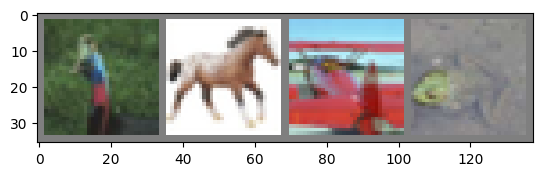

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수


def imshow(img):
    img = img / 2 + 0.5     # 표준화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # input channels, output channels, kernel size
        self.pool = nn.MaxPool2d(2, 2)   # kernel size, stride, padding = 0 (default)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 400)  # input features, output features (flattened after conv2)
        self.fc2 = nn.Linear(400, 84)          # 84 output features for fc2
        self.fc3 = nn.Linear(84, 10)           # 10 output features for fc3 (CIFAR-10 has 10 classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델의 인스턴스 생성
net = Net()

In [9]:
import torch.optim as optim

# optimizer 변경과 다른 하이퍼파라미터 조정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.999))

In [11]:
for epoch in range(10):  # 데이터셋을 10차례 반복하여 학습

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후
        inputs, labels = data
        # 변화도(Gradient) 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력

        running_loss += loss.item()
        # 1000개의 data를 학습할 때마다 loss 출력
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 1.698
[1,  2000] loss: 1.668
[1,  3000] loss: 1.636
[1,  4000] loss: 1.610
[1,  5000] loss: 1.611
[1,  6000] loss: 1.558
[1,  7000] loss: 1.551
[1,  8000] loss: 1.568
[1,  9000] loss: 1.534
[1, 10000] loss: 1.528
[1, 11000] loss: 1.499
[1, 12000] loss: 1.476
[2,  1000] loss: 1.439
[2,  2000] loss: 1.455
[2,  3000] loss: 1.441
[2,  4000] loss: 1.447
[2,  5000] loss: 1.406
[2,  6000] loss: 1.411
[2,  7000] loss: 1.408
[2,  8000] loss: 1.397
[2,  9000] loss: 1.391
[2, 10000] loss: 1.377
[2, 11000] loss: 1.356
[2, 12000] loss: 1.364
[3,  1000] loss: 1.333
[3,  2000] loss: 1.310
[3,  3000] loss: 1.294
[3,  4000] loss: 1.296
[3,  5000] loss: 1.297
[3,  6000] loss: 1.303
[3,  7000] loss: 1.308
[3,  8000] loss: 1.322
[3,  9000] loss: 1.284
[3, 10000] loss: 1.266
[3, 11000] loss: 1.271
[3, 12000] loss: 1.254
[4,  1000] loss: 1.221
[4,  2000] loss: 1.206
[4,  3000] loss: 1.241
[4,  4000] loss: 1.214
[4,  5000] loss: 1.174
[4,  6000] loss: 1.227
[4,  7000] loss: 1.200
[4,  8000] 

GroundTruth:    cat  ship  ship plane


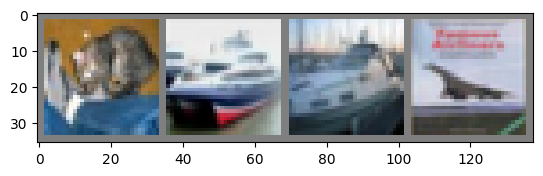

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.__next__()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

In [13]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 83 %
Accuracy of  bird : 50 %
Accuracy of   cat : 39 %
Accuracy of  deer : 52 %
Accuracy of   dog : 60 %
Accuracy of  frog : 74 %
Accuracy of horse : 67 %
Accuracy of  ship : 73 %
Accuracy of truck : 65 %


출처: https://m.blog.naver.com/ckdgus1433/221406102936의 튜토리얼을 참고하였습니다!

#과제

##1. 실습 파일의 overfitting model의 optimizer, epoch, learning rate 등을 변경하여 실행한 결과와, underfitting의 layer를 2개 이상 추가하여 실행한 결과를 각각 캡처하여 overfit, underfit이라는 이름으로 깃허브에 제출하기.  <br> <br>
##2. 과제 파일을 수정하여 Test image에 대한 accuracy를 55% 이상으로 높이고, 모델의 결과에 대한 캡처본과 파일을 모두 깃허브에 제출하기. <br>
Hint: 파일 중간중간에 설명이 있는 부분을 참고하시면 아마 될 겁니다!<br>
(layer 추가, optimizer 변경, learning rate 조정 등...) <br>
##3. MLP model과 기존 ML model의 차이점을 최소 2가지 측면에서 서술하기. <br>
답1: ML model은 특성 추출과 모델의 학습을 분리하여 수행하는 한편, MLP model은 여러 개의 은닉층을 포함하는 신경망 구조로써 은닉층에서 데이터로부터 특성을 추출하고 비선형 관계를 학습하며 역전파 알고리즘으로 모델의 가중치를 업데이트하여 학습한다.

답2: ML model은 상대적으로 적은 양의 데이터로도 일정 수준의 성능을 보이는 반면 MLP model은 대량의 데이터에서 의미있는 패턴을 학습하는 데 강점을 보인다.